In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
#"n 个观测值 n 个推定值 n个K n个事前分散 n个事后分散 1个系统噪声方差 1个观测误差方差"
def kalman_filter(n,Ob_val,Sys_noise,Ob_noise,firstpro,firstest):
    
    preD = np.empty(n)
    K = np.empty(n)
    af_D = np.empty(n)
    Xest = np.empty(n)
    preD[0] = firstpro**2+Sys_noise
    K[0]=preD[0]/(preD[0]+Ob_noise)
    Xest[0]=firstest+K[0]*(Ob_val[0]-firstest)
    af_D[0]=(1-K[0])*preD[0]
    for i in range(n-1):
        preD[i+1] = af_D[i]+Sys_noise
        K[i+1] = preD[i+1]/(preD[i+1]+Ob_noise)
        Xest[i+1]=Xest[i]+K[i+1]*(Ob_val[i+1]-Xest[i])
        af_D[i+1]=(1-K[i+1])*preD[i+1]
    return (Xest)

            


In [35]:
Ob_val = [49.95,49.967,50.1,50.106,49.992,49.819,49.993,50.007,50.023,49.99]
n = len(Ob_val)
Sys_noise = 0.0001
Ob_noise = 0.01
firstpro = 100
firstest = 10
Xest = kalman_filter(n,Ob_val,Sys_noise,Ob_noise,firstpro,firstest)
print(Xest)

[49.94996005 49.95852241 50.00646031 50.03220335 50.02369059 49.9865399
 49.98757816 49.99041034 49.99480397 49.99419628]


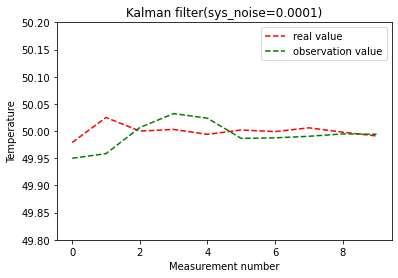

In [37]:
realval = [49.979,50.025,50,50.003,49.994,50.002,49.999,50.006,49.998,49.991]
x = np.arange(n)
l1=plt.plot(x,realval,'r--',label='real value')
l2=plt.plot(x,Xest,'g--',label='observation value')
# plt.plot(x1,y1,'ro-',x2,y2,'g+-',x3,y3,'b^-')
plt.title('Kalman filter(sys_noise=0.0001)')
plt.xlabel('Measurement number')
plt.ylabel('Temperature')
plt.ylim(49.8,50.2)
plt.legend()
plt.show()